# Problem Statement

A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

### Goal & Objective: 

The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.
Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets.
This is the first phase of the agreement; hence, company has shared very limited information. Once you are able to showcase a tangible impact with this much of information then company will open the 360 degree data lake for your consulting company to build a more robust model.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pd.options.display.max_columns = None


In [2]:
df1 = pd.read_csv("Data.csv")
df = df1.set_index('Ware_house_ID')
df.head()

,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
Ware_house_ID,,,,,,,,,,,,,,,,,,,,,,,
WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
df.shape

(25000, 23)

In [4]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, WH_100000 to WH_124999
Data columns (total 23 columns):
WH_Manager_ID                   25000 non-null object
Location_type                   25000 non-null object
WH_capacity_size                25000 non-null object
zone                            25000 non-null object
WH_regional_zone                25000 non-null object
num_refill_req_l3m              25000 non-null int64
transport_issue_l1y             25000 non-null int64
Competitor_in_mkt               25000 non-null int64
retail_shop_num                 25000 non-null int64
wh_owner_type                   25000 non-null object
distributor_num                 25000 non-null int64
flood_impacted                  25000 non-null int64
flood_proof                     25000 non-null int64
electric_supply                 25000 non-null int64
dist_from_hub                   25000 non-null int64
workers_num                     24010 non-null float64
wh_est_year                 

In [6]:
df.isnull().sum()

WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [7]:
df=df.drop('WH_Manager_ID',axis=1)

### Univariate analysis

In [8]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

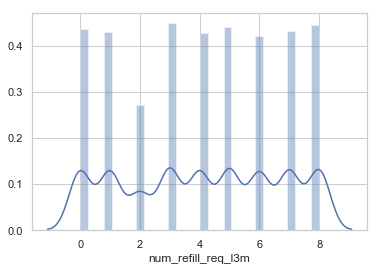

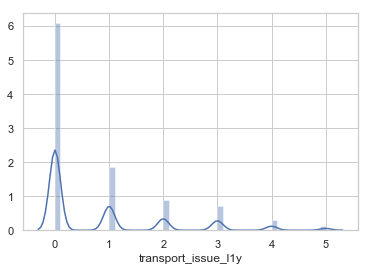

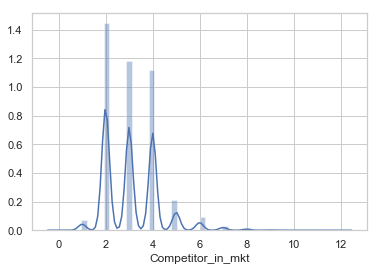

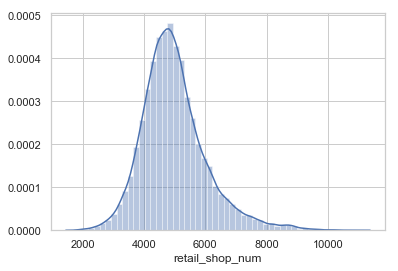

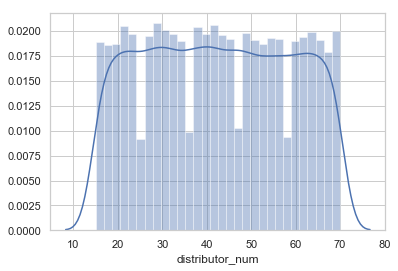

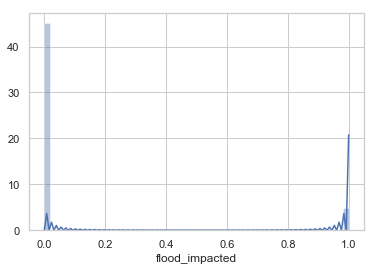

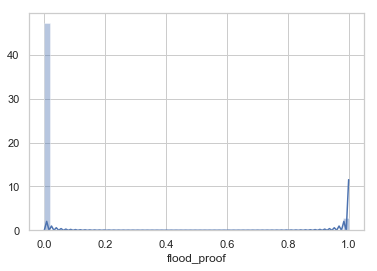

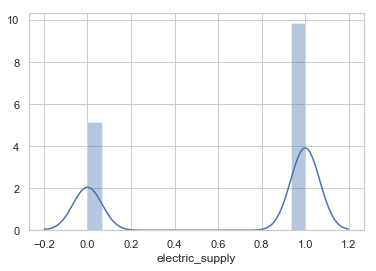

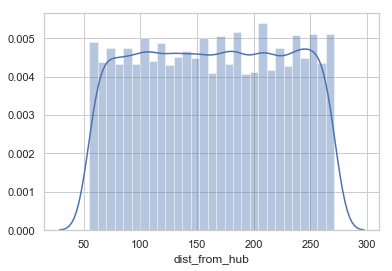

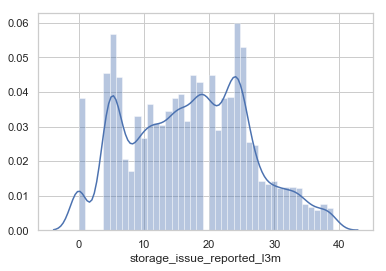

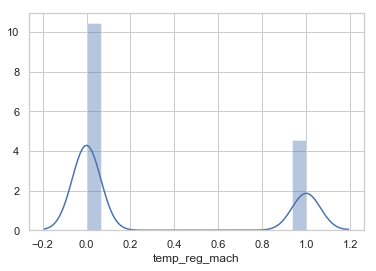

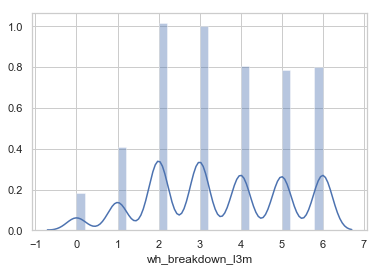

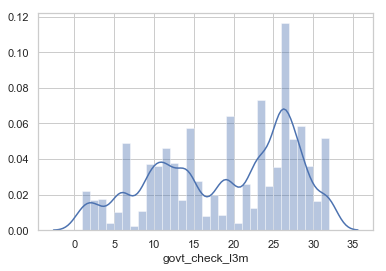

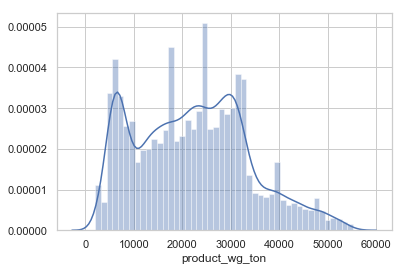

In [28]:
splot_cols=df.columns
for i in splot_cols:
    if df[i].dtype != 'object' and df[i].isnull().values.any() != True:
        sns.distplot(df[i])
        plt.show()

for i in range(0,len(df.columns)):
    j = df.columns[i]
    print(j)
    if df[j].dtype != 'object':
        print(df[j].isnull().sum())
        ax=fig.add_subplot(5,4,j+1)
        sns.distplot(data_plot[df.columns[j]], kde=True)
        plt.tight_layout()
        


# data_plot=df_new
# fig=plt.figure(figsize=(25,25));
# for i in range(0,len(data_plot.columns)):
#     ax=fig.add_subplot(17,4,i+1)
#     sns.distplot(data_plot[data_plot.columns[i]], kde=True)
#     plt.tight_layout()

splot_cols=df.columns
for i in splot_cols:
    sns.scatterplot(x=df[i], y=df['product_wg_ton'])
    plt.show()

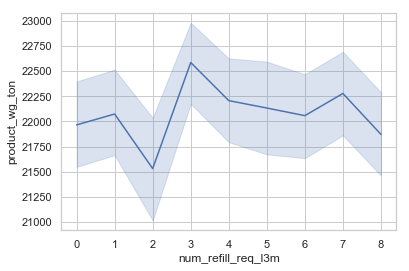

In [11]:
sns.lineplot(df['num_refill_req_l3m'],df['product_wg_ton'])

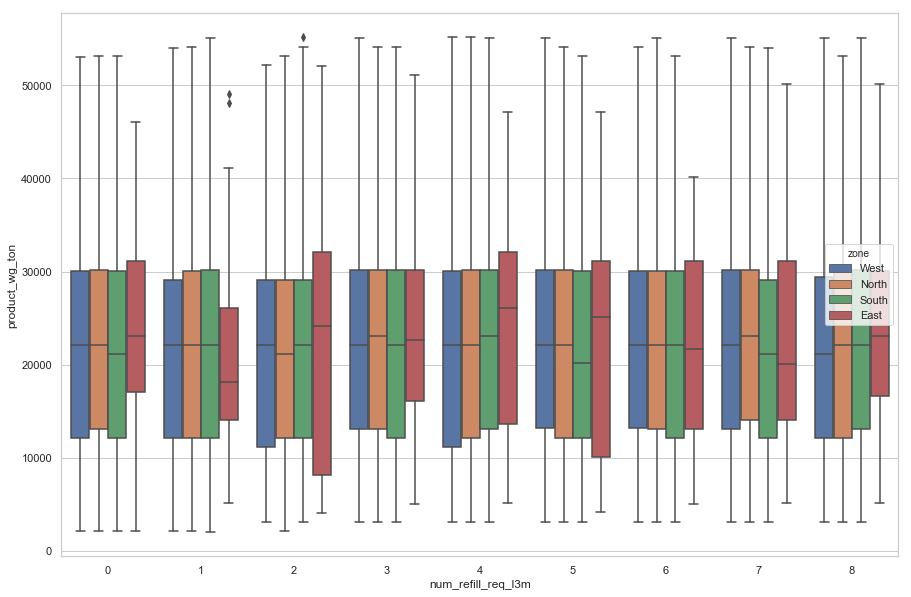

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(df['num_refill_req_l3m'],df['product_wg_ton'],hue=df['zone'])

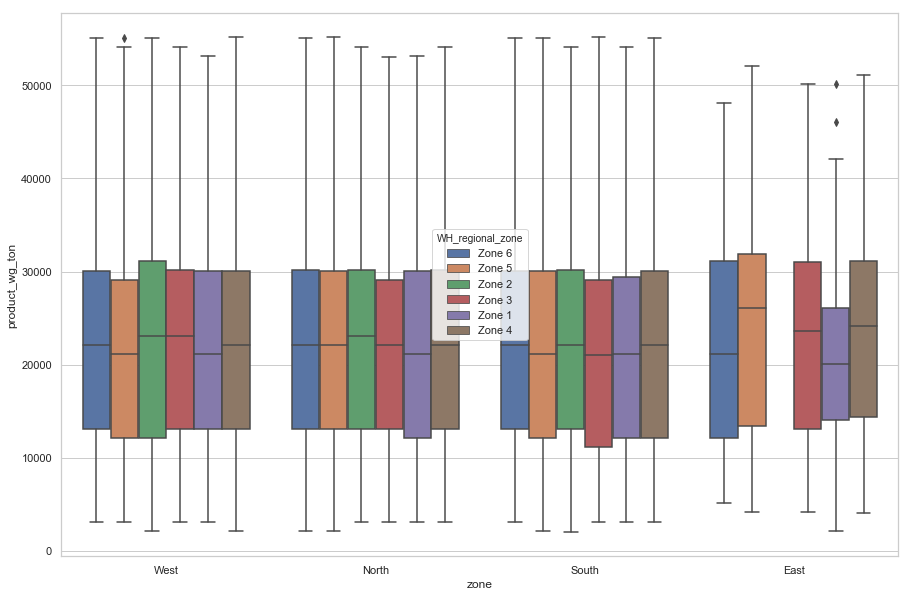

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(df['zone'],df['product_wg_ton'],hue=df['WH_regional_zone'])

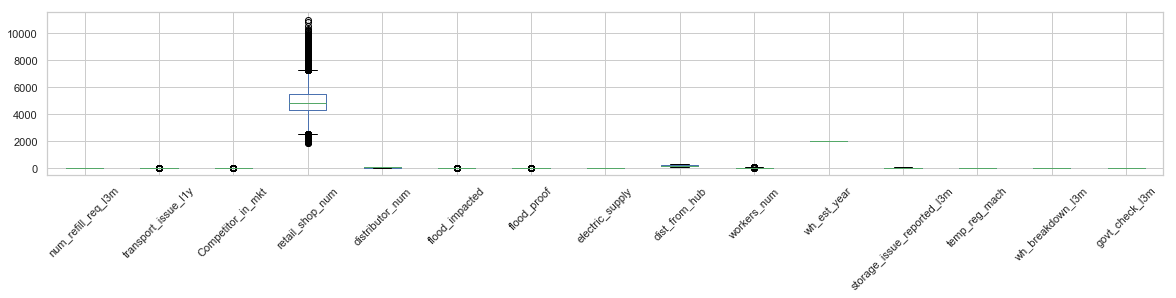

In [14]:
df2 = df.drop(['product_wg_ton'],axis=1)
df2.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [29]:
from matplotlib import style
  
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
